In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* We use a simple logistical regression with polynomial features and a small regularization (lambda = 0.0001) to get around numerical rounding problems

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.

* We determine, for each gear type, what the optimal degree of the polynomial is by running the regression for each degree of polynomial with a fixed window size.

* We can't easily automatically derive the grade of the polynomial from the regression over polynomial length, since the graph only flattens out, it doesn't have a minima, so it's a judgement call what is "good enough". Therefore the grade parameter has been hard-coded below, after examining the graph for grade vs cross validation error.

# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.169130111045, cross=0.187484358771
3600: Fitting... Scoring... Calc.err... train=0.167180308946, cross=0.187308308976
10800: Fitting... Scoring... Calc.err... train=0.148524585573, cross=0.180681451248
21600: Fitting... Scoring... Calc.err... train=0.136060259623, cross=0.166130373327
43200: Fitting... Scoring... Calc.err... train=0.129533345652, cross=0.153424901568
86400: Fitting... Scoring... Calc.err... train=0.139408875275, cross=0.165275315971


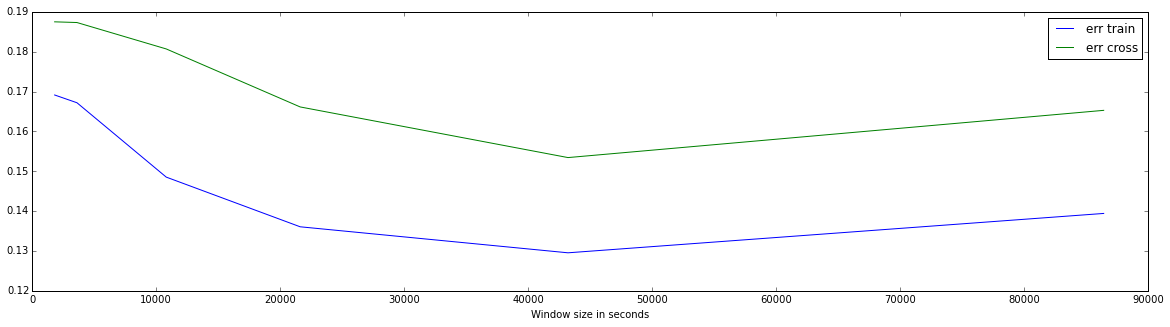

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.147009278724, cross=0.167759987284
3: Fitting... Scoring... Calc.err... train=0.133231275216, cross=0.157668177372
4: Fitting... Scoring... Calc.err... train=0.129533338811, cross=0.153424903108
5: Fitting... Scoring... Calc.err... train=0.128968235421, cross=0.152558320915
6: Fitting... Scoring... Calc.err... train=0.127084550994, cross=0.152155010547
7: Fitting... Scoring... Calc.err... train=0.126784175426, cross=0.149966585821
8: Fitting... Scoring... Calc.err... train=0.126483361885, cross=0.150447221993
9: Fitting... Scoring... Calc.err... train=0.126841116813, cross=0.150995408393


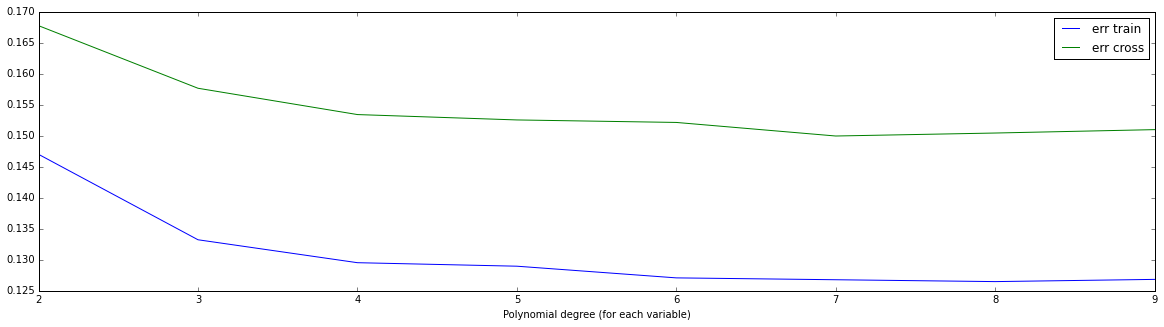

Evaluation using Alex' data:


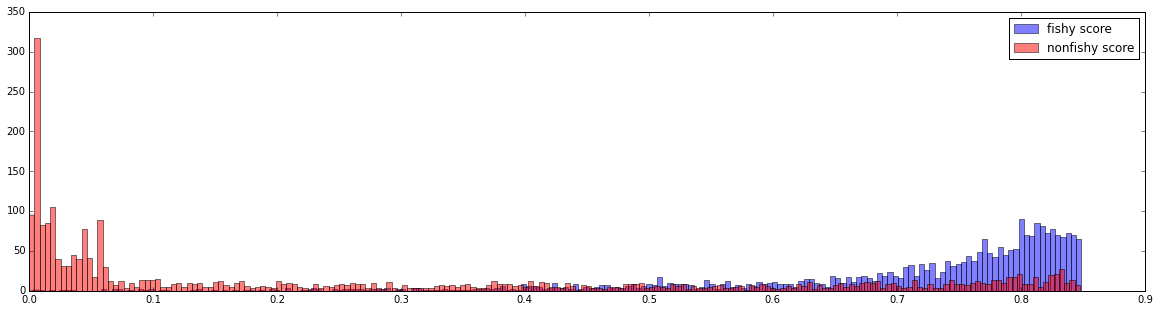

Squared numerical error: 0.128886055628
Error (overlap): 34.4%
Error (overlap) above cutoff of 0.5: 44.5357999315%
For cutoff of 0.5
True positives 2079
False positives 662
True negatives 1838
False negatives 201
accuracy 0.7834
precision 0.758482305728
recall 0.911842105263


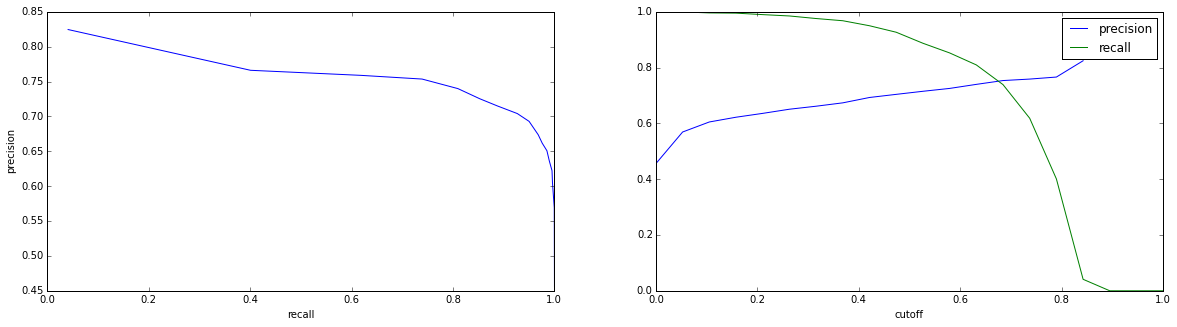

Score window: 43200
Score polynomial: [ -1.78614767 -17.23840076  22.51055648  22.976683   -33.29571518
  -1.78614767 -16.76491643 -15.32859838  -5.69953904  -0.75861662
  -1.78614767  -4.9848893   -2.60940175   1.66441033   0.69534097]
Evaluate using Kristinas data:


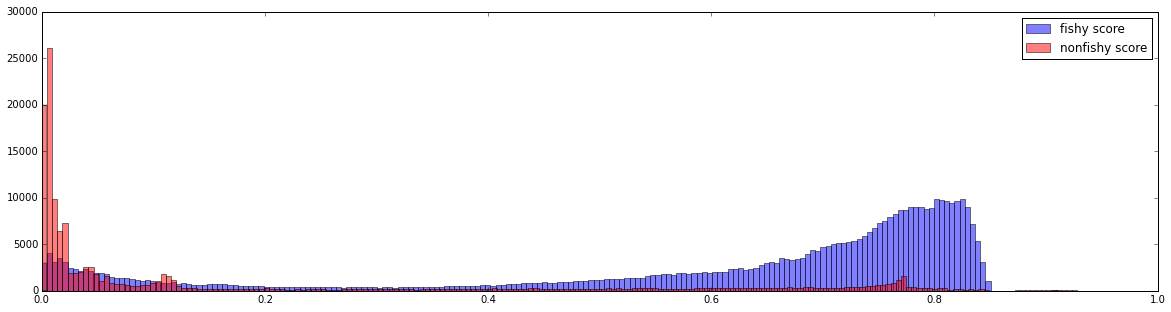

Squared numerical error: 0.189292246399
Error (overlap): 28.914634489%
Error (overlap) above cutoff of 0.5: 14.086961848%
For cutoff of 0.5
True positives 334293
False positives 26138
True negatives 112341
False negatives 96732
accuracy 0.784250856886
precision 0.927481265485
recall 0.77557682269


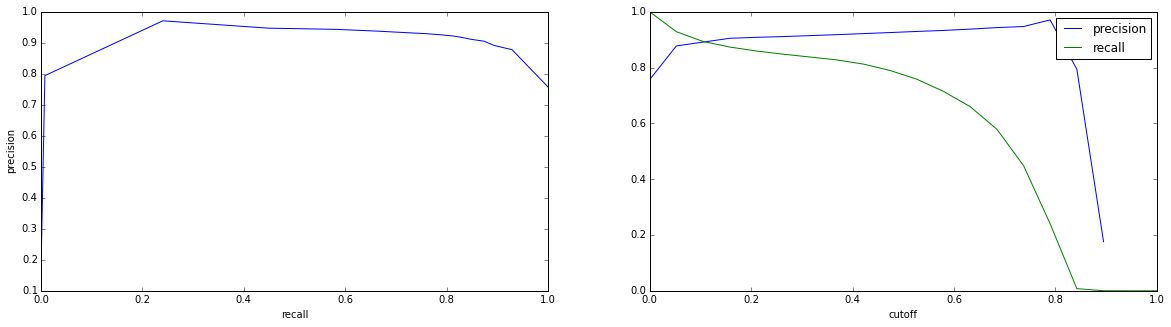

Score window: 43200
Score polynomial: [ -1.78615917 -17.23830489  22.51053173  22.9762143  -33.29524755
  -1.78615917 -16.76504974 -15.3287224   -5.69958855  -0.75862368
  -1.78615917  -4.98484938  -2.60938977   1.66441767   0.69534568]


In [2]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, 5, min_window)
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, _x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.alex-scores.npz", x=_x.filled())

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.142282127072, cross=0.220937325532
3600: Fitting... Scoring... Calc.err... train=0.139984711531, cross=0.21490440473
10800: Fitting... Scoring... Calc.err... train=0.126243407826, cross=0.209812109268
21600: Fitting... Scoring... Calc.err... train=0.117506857456, cross=0.211292079818
43200: Fitting... Scoring... Calc.err... train=0.0934465217174, cross=0.2058407686
86400: Fitting... Scoring... Calc.err... train=0.111747184455, cross=0.214813436011


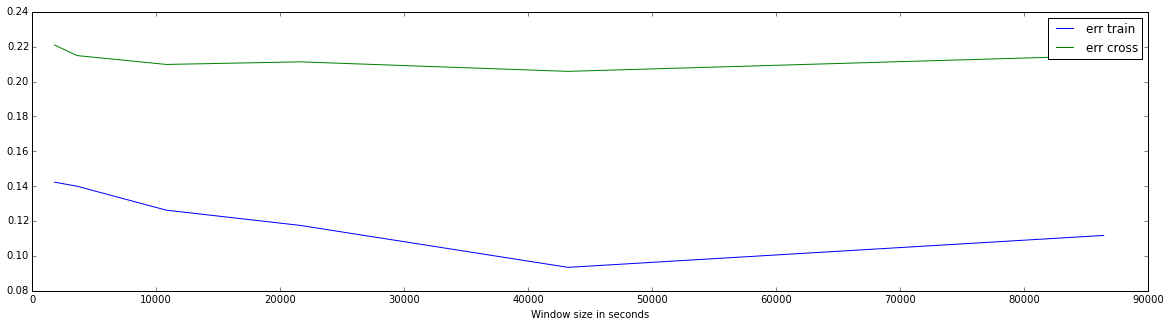

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.1071570203, cross=0.242958870826
3: Fitting... Scoring... Calc.err... train=0.105508351514, cross=0.249607418023
4: Fitting... Scoring... Calc.err... train=0.0934465139087, cross=0.205840560542
5: Fitting... Scoring... Calc.err... train=0.0893052674916, cross=0.190281227083
6: Fitting... Scoring... Calc.err... train=0.0893328755467, cross=0.187963912992
7: Fitting... Scoring... Calc.err... train=0.151060409156, cross=0.263785701855
8: Fitting... Scoring... Calc.err... train=0.0893437117976, cross=0.186512897434
9: Fitting... Scoring... Calc.err... train=0.0894221871956, cross=0.189708988558


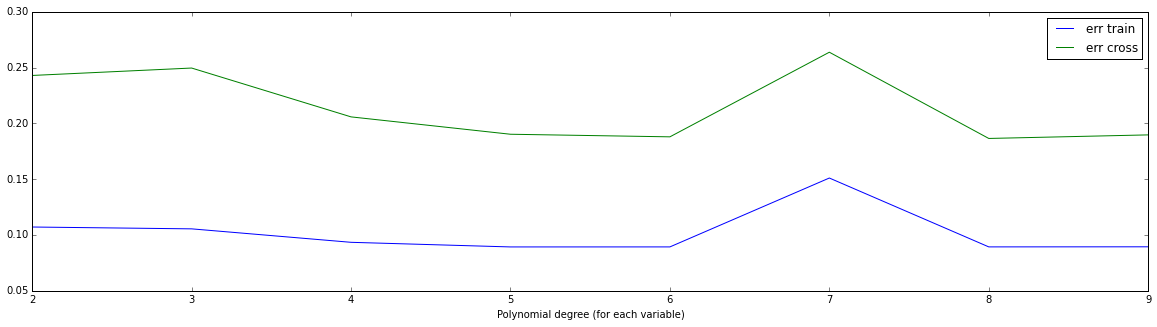

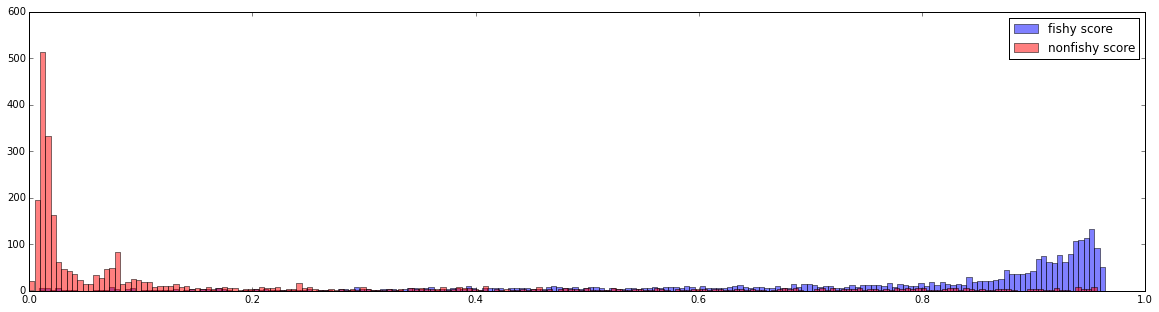

Squared numerical error: 0.0897683529973
Error (overlap): 21.72%
Error (overlap) above cutoff of 0.5: 23.5582822086%
For cutoff of 0.5
True positives 2156
False positives 286
True negatives 2214
False negatives 344
accuracy 0.874
precision 0.882882882883
recall 0.8624


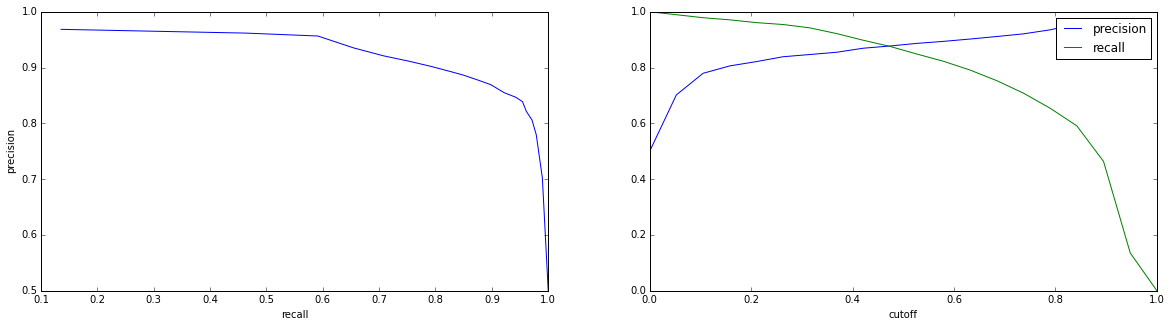

Score window: 43200
Score polynomial: [  -2.84937035   14.12045856  -93.05038137  200.04571338 -123.86517071
   -2.84937034  -26.11147581  -27.81848516  -12.08202918   -1.81095373
   -2.84937035    0.84223687    1.07608716    2.0279872     0.57949951]


In [4]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.kristina-scores.npz", x=x.filled())

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

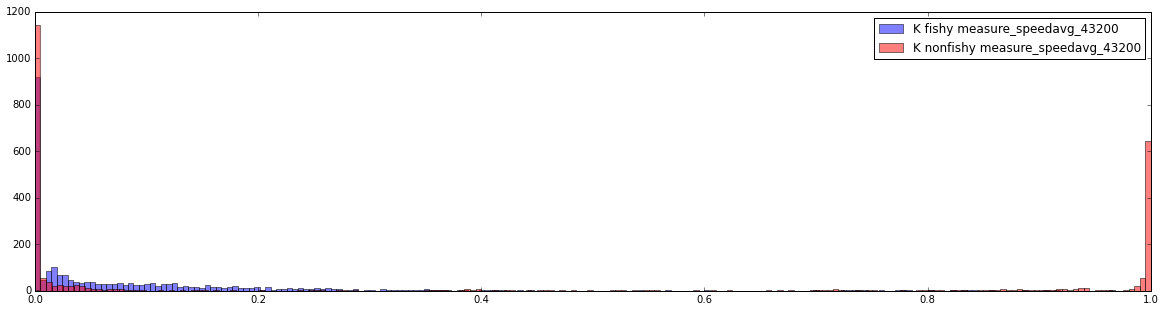

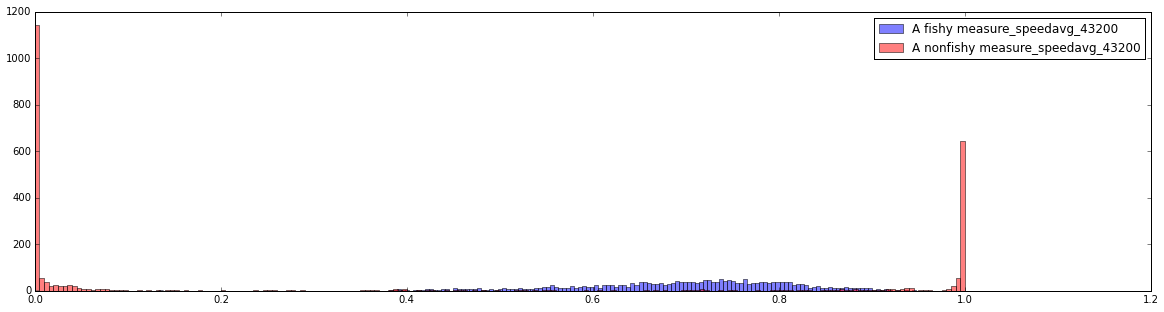

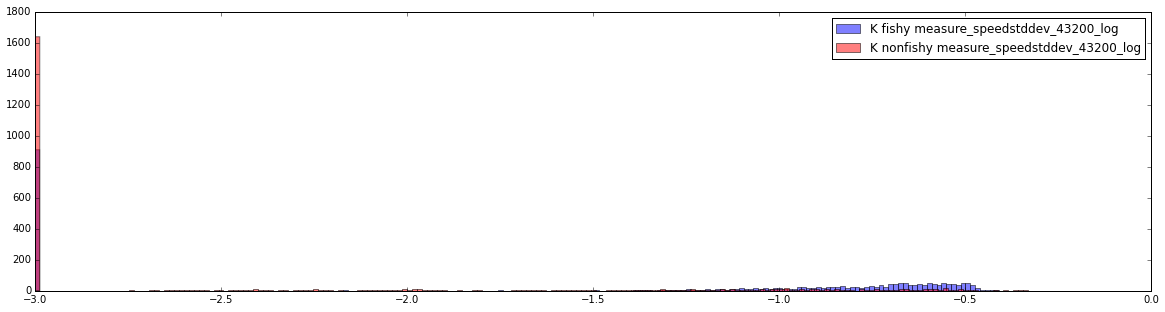

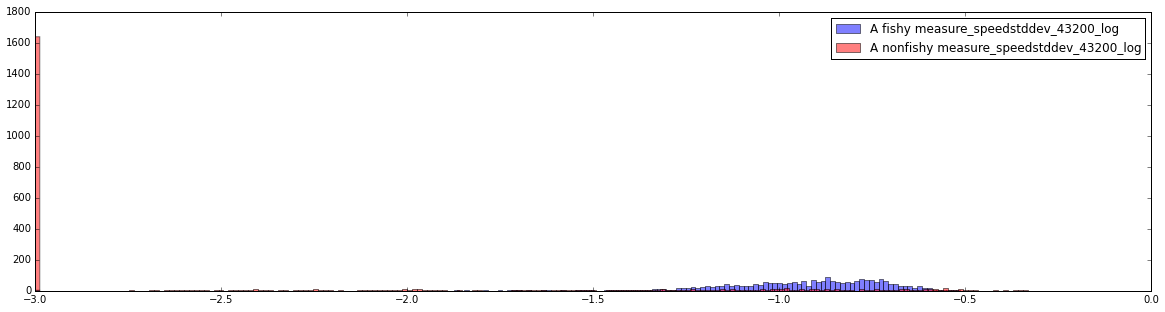

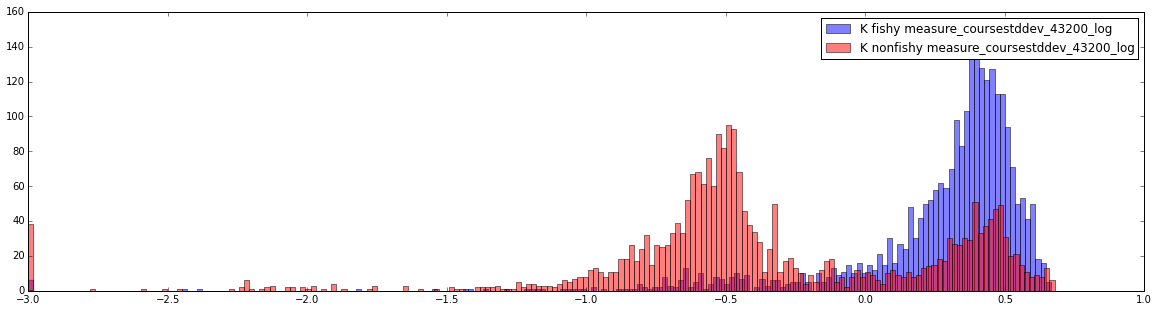

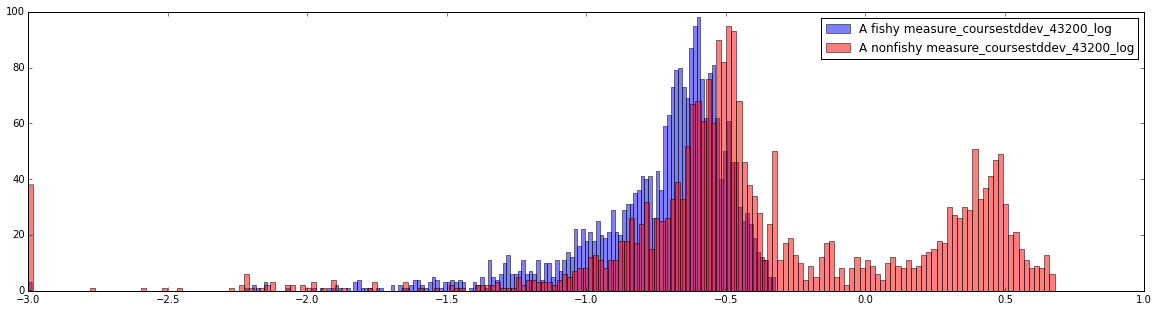

In [5]:
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.068782818983, cross=0.16583416559
3600: Fitting... Scoring... Calc.err... train=0.0669733229937, cross=0.165920332146
10800: Fitting... Scoring... Calc.err... train=0.061877559867, cross=0.166601276519
21600: Fitting... Scoring... Calc.err... train=0.0610279780267, cross=0.171791815871
43200: Fitting... Scoring... Calc.err... train=0.0719397060975, cross=0.191992753757
86400: Fitting... Scoring... Calc.err... train=0.0817912922181, cross=0.209599979344


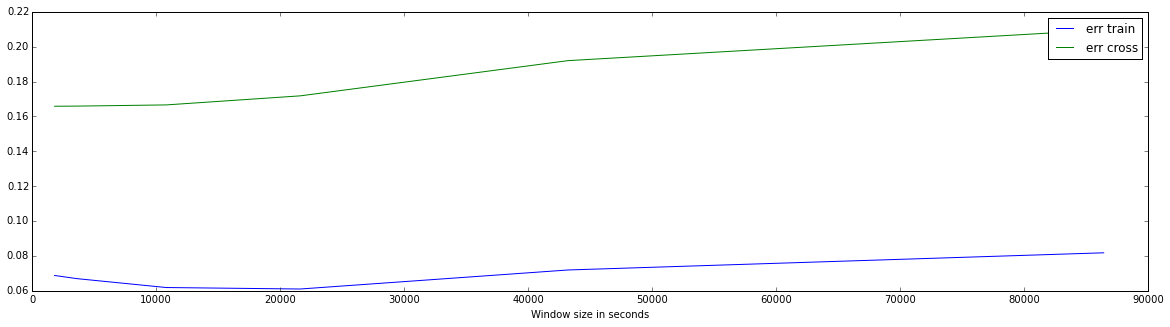

Best window size: 1800
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.222838786915, cross=0.218615371882
3: Fitting... Scoring... Calc.err... train=0.0806982356186, cross=0.173390598711
4: Fitting... Scoring... Calc.err... train=0.0687828518844, cross=0.165834391833
5: Fitting... Scoring... Calc.err... train=0.0631755043772, cross=0.157976029776
6: Fitting... Scoring... Calc.err... train=0.0619502045353, cross=0.155956178817
7: Fitting... Scoring... Calc.err... train=0.610087114105, cross=0.486709318602
8: Fitting... Scoring... Calc.err... train=0.475574743437, cross=0.473626099596
9: Fitting... Scoring... Calc.err... train=0.499980184896, cross=0.499918407593


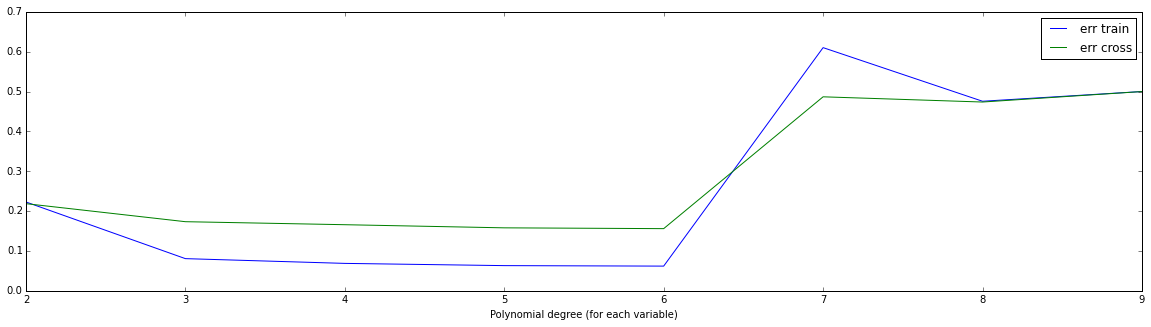

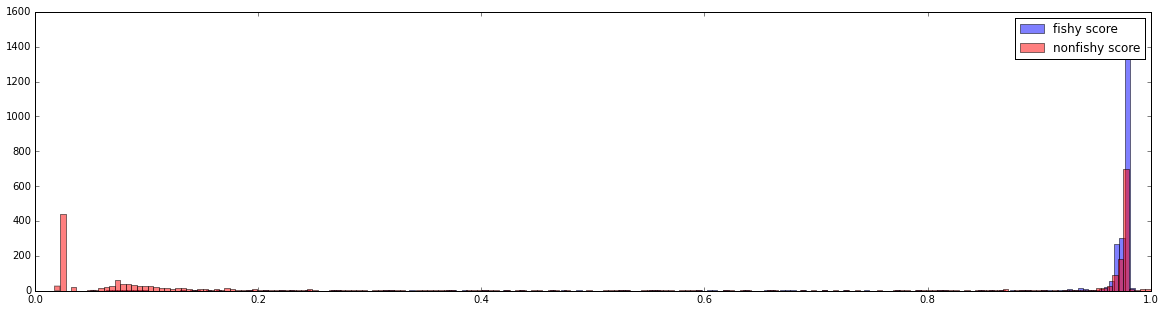

Squared numerical error: 0.25220728656
Error (overlap): 13.96%
Error (overlap) above cutoff of 0.5: 12.9543591145%
For cutoff of 0.5
True positives 2371
False positives 1282
True negatives 1218
False negatives 129
accuracy 0.7178
precision 0.649055570764
recall 0.9484


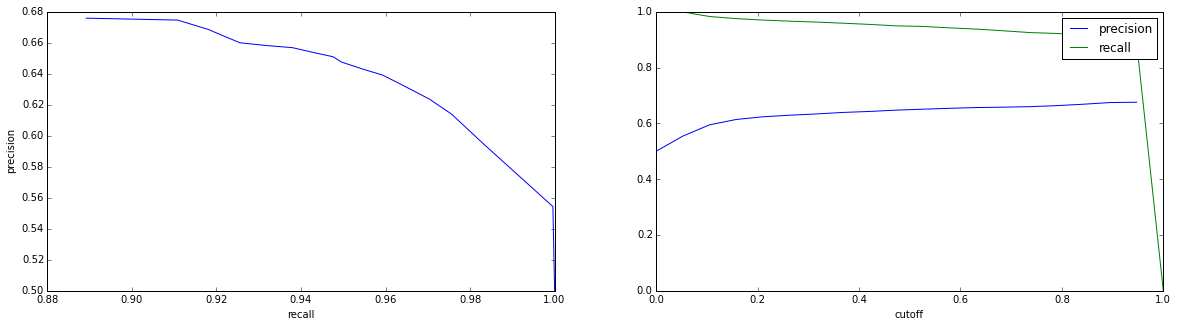

Score window: 1800
Score polynomial: [  5.83947208e+00  -1.32659252e+02   2.75794190e+02  -1.64018462e+02
   5.83947208e+00  -7.19358546e-02  -7.47242761e-03  -2.83332716e-02
   5.83947208e+00   6.47186779e-01   3.23691855e-01   8.41452605e-02]


In [10]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 4, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 4, min_window)
numpy.savez_compressed("datasets/kristina_trawl.scores.npz", x=x.filled())

# Purse seiners

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.130022306642, cross=0.162975374212
3600: Fitting... Scoring... Calc.err... train=0.127947850522, cross=0.173175067511
10800: Fitting... Scoring... Calc.err... train=0.140465173556, cross=0.183546501148
21600: Fitting... Scoring... Calc.err... train=0.147201502262, cross=0.165579863893
43200: Fitting... Scoring... Calc.err... train=0.180136761269, cross=0.170839520323
86400: Fitting... Scoring... Calc.err... train=0.194515252228, cross=0.193805085193


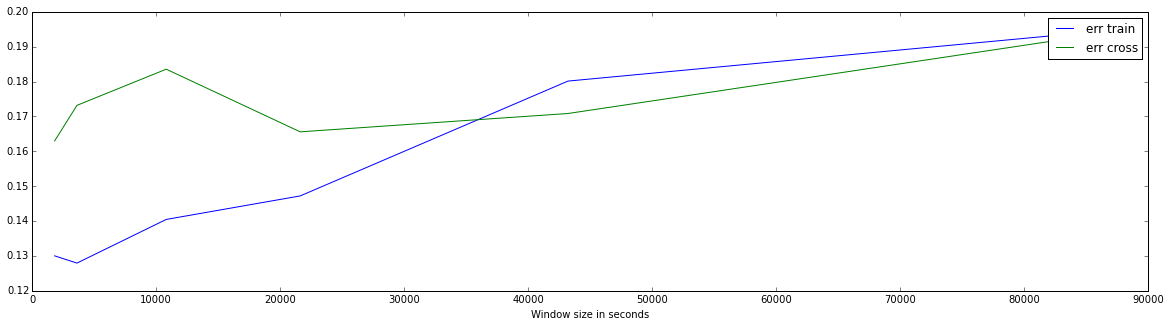

Best window size: 1800
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.139748089861, cross=0.171600773407
3: Fitting... Scoring... Calc.err... train=0.137046427443, cross=0.160926059286
4: Fitting... Scoring... Calc.err... train=0.130022397892, cross=0.162975876642
5: Fitting... Scoring... Calc.err... train=0.122167551594, cross=0.155343145291
6: Fitting... Scoring... Calc.err... train=0.117814828486, cross=0.148016584711
7: Fitting... Scoring... Calc.err... train=0.499567005384, cross=0.498863037295
8: Fitting... Scoring... Calc.err... train=0.118143764259, cross=0.151851050752
9: Fitting... Scoring... Calc.err... train=0.499582656135, cross=0.498930258782


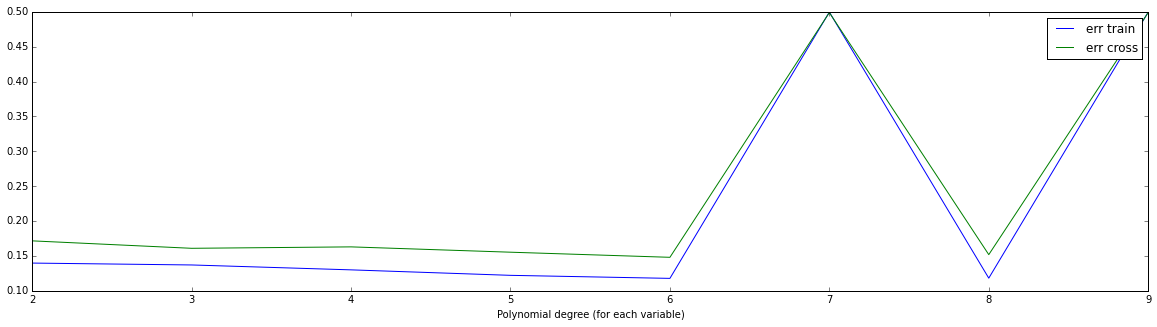

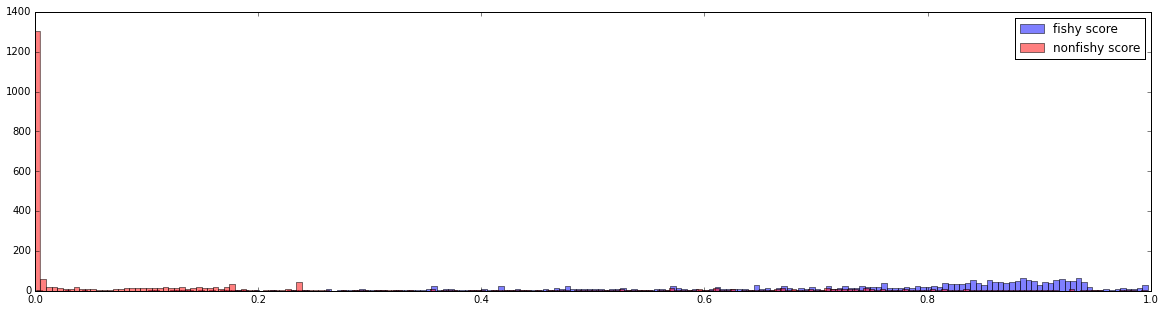

Squared numerical error: 0.113511549882
Error (overlap): 26.24%
Error (overlap) above cutoff of 0.5: 36.0233918129%
For cutoff of 0.5
True positives 2095
False positives 482
True negatives 2018
False negatives 405
accuracy 0.8226
precision 0.81296080714
recall 0.838


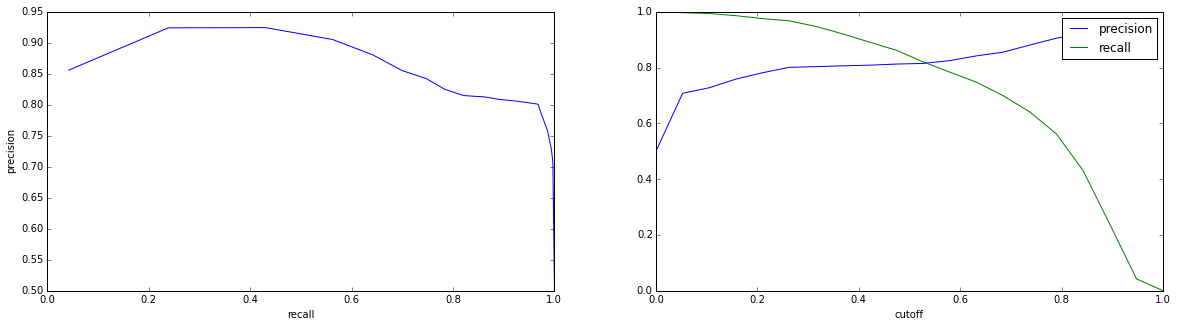

Score window: 1800
Score polynomial: [ -5.09990304e+00   1.90084581e+02  -3.60379793e+02   1.00668418e+02
   3.48745023e+02  -2.44239802e+02  -5.09990298e+00   4.02794860e+01
   2.01919173e+01  -3.53072968e+00  -4.90155590e+00  -8.95336369e-01
  -5.09990296e+00  -3.43590662e+00  -8.31685634e-01   3.60377687e-01
  -2.34353651e-01  -1.16769578e-01]


In [8]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_ps.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 6, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_ps.scores.npz", x=x.filled())